# Example usage for clustering in "movekit"

In [1]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, convex_hull_plot_2d

/home/lukas/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


### Read in CSV file and preprocess

In [2]:
# Enter path to CSV file
path = "./datasets/fish-5.csv"

In [3]:
# Read in CSV file and preprocess
data = mkit.read_data(path)
preprocessed_data = mkit.preprocess(data)

Total number of missing values =  0
y            0
x            0
animal_id    0
time         0
dtype: int64


In [4]:
# converting positional data into scale, defined by user
mkit.convert_measueres(preprocessed_data, x_min = 0, x_max = 100, y_min = 0, y_max = 100).head()

,time,animal_id,x,y
0,1,312,49.663862,84.937627
1,1,511,44.688738,87.375033
2,1,607,47.555424,82.312218
3,1,811,55.281665,83.650358
4,1,905,44.134850,92.457755


### Detecting outliers
Function performs detection of outliers, based on user's criteria, regarding features, method and share of outliers.

In [5]:
# Extracting features for later use
feats = mkit.extract_features(preprocessed_data, fps = 3)

,time,animal_id,x,y,voronoi_object,area_voronoi
0,1,312,405.29,417.76,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,2414.225693
3000,1,811,445.15,411.94,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,inf
2000,1,607,390.33,405.89,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,inf
4000,1,905,366.06,451.76,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,inf
1000,1,511,369.99,428.78,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,inf
1,2,312,405.31,417.37,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,2389.875725
2001,2,607,390.25,405.89,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,inf
3001,2,811,445.48,412.26,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,inf
4001,2,905,365.86,451.76,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,inf
1001,2,511,370.01,428.82,<scipy.spatial.qhull.Voronoi object at 0x7f9e0...,inf


In [13]:
mkit.get_convex_hulls_areas(preprocessed_data, group_output=True).head(10)

,time,convex_hull_volume,convex_hull_object
0,1,1519.44120,<scipy.spatial.qhull.ConvexHull object at 0x7f...
1,2,1528.95525,<scipy.spatial.qhull.ConvexHull object at 0x7f...
2,3,1539.23800,<scipy.spatial.qhull.ConvexHull object at 0x7f...
3,4,1549.61380,<scipy.spatial.qhull.ConvexHull object at 0x7f...
4,5,1560.33905,<scipy.spatial.qhull.ConvexHull object at 0x7f...
5,6,1570.48570,<scipy.spatial.qhull.ConvexHull object at 0x7f...
6,7,1579.95305,<scipy.spatial.qhull.ConvexHull object at 0x7f...
7,8,1588.37025,<scipy.spatial.qhull.ConvexHull object at 0x7f...
8,9,1594.50650,<scipy.spatial.qhull.ConvexHull object at 0x7f...
9,10,1597.86610,<scipy.spatial.qhull.ConvexHull object at 0x7f...


In [6]:
outs = mkit.outlier_detection(feats)

# printing all rows where outliers are present
outs[outs.loc[:,"outlier"] == 1]

,time,animal_id,outlier,x,y,distance,average_speed,average_acceleration,direction,stopped
1876,877,511,1,64.024072,7.887287,0.645740,0.645586,0.012156,-1.570202,0
1989,990,511,1,84.668724,35.864372,0.989962,0.974461,-0.011696,85.181662,0
1990,991,511,1,84.777247,36.784482,0.926487,0.934912,-0.039548,83.273314,0
1991,992,511,1,84.925232,37.660356,0.888287,0.895494,-0.039419,80.410027,0


In [6]:
# same function, different parameters
other_outs = mkit.outlier_detection(dataset = feats, features = ["average_speed", "average_acceleration"], contamination = 0.05, n_neighbors = 8, method = "median", metric = "euclidean")

# printing all rows where outliers are present
other_outs[other_outs.loc[:,"outlier"] == 1].head()

,time,animal_id,outlier,x,y,distance,average_speed,average_acceleration,direction,stopped
697,698,312,1,14.463095,47.140140,0.724021,0.722229,0.043150,-71.265096,0
698,699,312,1,14.718194,46.414669,0.769015,0.773842,0.051613,-70.626723,0
699,700,312,1,15.001480,45.636114,0.828491,0.819444,0.045602,-70.005491,0
700,701,312,1,15.300269,44.828807,0.860826,0.849685,0.030241,-69.690192,0
701,702,312,1,15.601877,44.023711,0.859737,0.850136,0.000452,-69.462855,0


### Group-level Analysis

Below we perform Analysis on Group-Level. This consists of:
- Group-Level averages,
- Centroid Medoid computation
- A dynamic time warping matrix, 
- A clustering over time based on absolute features,
- The centroid direction,
- The heading difference of each animal with respect to the current centroid
- The group - polarization for each timestep. 

#### Obtain group-level records for each point in time
Records consist of total group-distance, mean-speed mean-acceleration and mean distance from centroid. If input doesn't contain centroid or feature data, it is calculated, showing a warning.
Parameter object_output produces a post gis - compatible point.

In [18]:
mkit.group_movement(data).head()

,total_dist,mean_speed,mean_acceleration,mean_distance_centroid
time,,,,
1,0.000000,0.157979,-0.000339,29.4616
2,1.174908,0.157641,-0.000339,29.5850
3,1.025155,0.155610,-0.000339,29.6914
4,0.918960,0.153579,-0.000339,29.7782
5,0.830461,0.153341,-0.000339,29.8518


#### Obtain centroid, medoid and distance to centroid 
Parameter options go either for each unit per timestamp or as post-gis compatible object

In [19]:
movement = mkit.centroid_medoid_computation(data, object_output = False)

In [20]:
movement.head()

,time,animal_id,x,y,x_centroid,y_centroid,medoid,distance_to_centroid
0,1,312,405.29,417.76,395.364,423.226,312,11.331
1,2,312,405.31,417.37,395.382,423.220,312,11.523
2,3,312,405.31,417.07,395.392,423.234,312,11.677
3,4,312,405.30,416.86,395.396,423.272,312,11.798
4,5,312,405.29,416.71,395.394,423.324,312,11.903


#### Obtain a matrix, based on dynamic time warping
Each Animal-ID is displayed in the indices, the entries reflect the euclidean distances of the animal's trajectories.

In [9]:
mkit.dtw_matrix(preprocessed_data)

,312,511,607,811,905
312,0.000000,5559.971244,5873.940640,8235.343344,7221.072340
511,5559.971244,0.000000,5119.824950,8667.471335,4258.767686
607,5874.377835,5119.822061,0.000000,7491.758830,7215.670756
811,8235.343344,8667.471335,7491.758830,0.000000,6826.692241
905,7221.068698,4258.767686,7215.670756,6826.692241,0.000000


#### Time series clustering for absolute features
Function can also be executed without extracted features, performing a standard feature-extraction before.

In [10]:
feats = mkit.extract_features(preprocessed_data)

In [11]:
mkit.ts_cluster(feats, 3).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,cluster,ClustCenter,centroid_distance,centroid_average_speed,centroid_average_acceleration,centroid_direction,centroid_stopped
0,1,312,49.663862,84.937627,0.000000,0.046467,-0.004028,0.000000,1,2,"[0.0, 0.02532879420014326, -0.0019764981658822...",0.000000,0.025329,-0.001976,0.000000,1.0
1,2,312,49.666681,84.851367,0.086306,0.042439,-0.004028,-88.128385,1,2,"[0.04779586109497597, 0.023352296034260988, -0...",0.047796,0.023352,-0.001976,-7.900269,1.0
2,3,312,49.666681,84.785013,0.066354,0.038588,-0.004028,-90.000000,1,2,"[0.036494735910828524, 0.02145377606448439, -0...",0.036495,0.021454,-0.001976,0.000000,1.0
3,4,312,49.665271,84.738565,0.046469,0.035147,-0.004028,-91.738013,1,2,"[0.024340512839601654, 0.019739717508604312, -...",0.024341,0.019740,-0.001976,-0.869007,1.0
4,5,312,49.663862,84.705388,0.033207,0.034257,-0.004028,-92.432502,1,2,"[0.018012861155310162, 0.019311773053556282, -...",0.018013,0.019312,-0.001976,43.783749,1.0
5,6,312,49.661043,84.683270,0.022297,0.033253,-0.004028,-97.262745,1,2,"[0.013469805204849625, 0.01930484047255212, -0...",0.013470,0.019305,-0.001976,-102.467449,1.0
6,7,312,49.661043,84.667787,0.015483,0.036548,-0.003851,-90.000000,1,2,"[0.010062656245824815, 0.02184504608307918, -0...",0.010063,0.021845,-0.001899,-98.836077,1.0
7,8,312,49.661043,84.656728,0.011059,0.032483,-0.003441,-90.000000,1,2,"[0.007741307617443738, 0.020300148261123457, -...",0.007741,0.020300,-0.001714,-90.000000,1.0
8,9,312,49.666681,84.630187,0.027134,0.028208,-0.000890,-78.008390,1,2,"[0.015888217413172052, 0.018712951045176382, -...",0.015888,0.018713,-0.000428,-2.840272,1.0
9,10,312,49.676546,84.608069,0.024219,0.026307,-0.001004,-65.960864,1,2,"[0.019242447243514624, 0.018740522273941004, -...",0.019242,0.018741,-0.000007,-37.439888,1.0


#### Get the centroid direction
If no centroid coordinates are found in input, function calculates centroids first, emitting a warning.

In [23]:
mkit.compute_centroid_direction(data).sort_values(['time','animal_id'])

,time,animal_id,x,y,x_centroid,y_centroid,centroid_direction
0,1,312,405.29,417.76,395.364,423.226,NaN
1000,1,511,369.99,428.78,395.364,423.226,NaN
2000,1,607,390.33,405.89,395.364,423.226,NaN
3000,1,811,445.15,411.94,395.364,423.226,NaN
4000,1,905,366.06,451.76,395.364,423.226,NaN
1,2,312,405.31,417.37,395.382,423.220,-18.434949
1001,2,511,370.01,428.82,395.382,423.220,-18.434949
2001,2,607,390.25,405.89,395.382,423.220,-18.434949
3001,2,811,445.48,412.26,395.382,423.220,-18.434949
4001,2,905,365.86,451.76,395.382,423.220,-18.434949


#### Getting the heading difference
Calculate the difference in degrees between the animal's direction and the centroid's direction for each timestep. Stronger gain in y gives positive difference, weaker gain in y gives negative difference, since constant y is defined to be 0 degrees.

In [12]:
mkit.get_heading_difference(feats).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,x_centroid,y_centroid,medoid,distance_to_centroid,centroid_direction,heading_difference
0,1,312,49.663862,84.937627,0.000000,0.046467,-0.004028,0.000000,1,48.265,86.147,312,1.849,NaN,NaN
1,2,312,49.666681,84.851367,0.086306,0.042439,-0.004028,-88.128385,1,48.267,86.145,312,1.906,-45.000000,-43.128385
2,3,312,49.666681,84.785013,0.066354,0.038588,-0.004028,-90.000000,1,48.269,86.148,312,1.952,56.309932,-146.309932
3,4,312,49.665271,84.738565,0.046469,0.035147,-0.004028,-91.738013,1,48.269,86.157,312,1.990,90.000000,178.261987
4,5,312,49.663862,84.705388,0.033207,0.034257,-0.004028,-92.432502,1,48.269,86.168,312,2.021,90.000000,177.567498
5,6,312,49.661043,84.683270,0.022297,0.033253,-0.004028,-97.262745,1,48.268,86.182,312,2.046,94.085617,168.651639
6,7,312,49.661043,84.667787,0.015483,0.036548,-0.003851,-90.000000,1,48.268,86.200,312,2.071,90.000000,-180.000000
7,8,312,49.661043,84.656728,0.011059,0.032483,-0.003441,-90.000000,1,48.267,86.220,312,2.095,92.862405,177.137595
8,9,312,49.666681,84.630187,0.027134,0.028208,-0.000890,-78.008390,1,48.268,86.241,312,2.133,87.273689,-165.282079
9,10,312,49.676546,84.608069,0.024219,0.026307,-0.001004,-65.960864,1,48.270,86.262,312,2.171,84.559668,-150.520532


#### Computing polarization
Computing polarization of animals for each timestep. Value is between 0 and 1

In [22]:
mkit.compute_polarization(feats).head()


,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,polarization
0,1,312,405.29,417.76,0.000000,0.195256,0.034915,0.000000,1,1.000000
1,2,312,405.31,417.37,0.390512,0.230171,0.034915,-87.064327,1,0.248837
2,3,312,405.31,417.07,0.300000,0.300250,0.070079,-90.000000,1,0.323950
3,4,312,405.30,416.86,0.210238,0.220190,-0.080060,-92.726311,1,0.125276
4,5,312,405.29,416.71,0.150333,0.154184,-0.066007,-93.814075,1,0.037233


#### Producing a voronoi diagram
Each timestep gets a voronoi object as well as the area of the voronoi - shape. Infinity, if respective animal is outmost in swarm.

Voronoi object contains the following attributes:

`.points`
- Coordinates of input points.

`.vertices`
- Coordinates of the Voronoi vertices.

`ridge_points`
- Indices of the points between which each Voronoi ridge lies.

`ridge_vertices`
- Indices of the Voronoi vertices forming each Voronoi ridge.

`regions`
- Indices of the Voronoi vertices forming each Voronoi region. -1 indicates vertex outside the Voronoi diagram.

`point_region`
- Index of the Voronoi region for each input point. If qhull option “Qc” was not specified, the list will contain -1 for points that are not associated with a Voronoi region.

`furthest_site`
- True if this was a furthest site triangulation and False if not.



#### Voronoi diagram 
Function returns voronoi object and the area for each unit into the dataframe. As shown above, one may use one of the attributes above on the respective objects.

In [10]:
voronoi_frame = mkit.voronoi_diagram(data)
voronoi_frame.head()


,time,animal_id,x,y,voronoi_object,area_voronoi
0,1,312,405.29,417.76,<scipy.spatial.qhull.Voronoi object at 0x7effd...,2414.225693
1,2,312,405.31,417.37,<scipy.spatial.qhull.Voronoi object at 0x7effd...,2389.875725
2,3,312,405.31,417.07,<scipy.spatial.qhull.Voronoi object at 0x7effd...,2372.018571
3,4,312,405.30,416.86,<scipy.spatial.qhull.Voronoi object at 0x7effd...,2360.489279
4,5,312,405.29,416.71,<scipy.spatial.qhull.Voronoi object at 0x7effd...,2350.628662


#### Plotting exemplary voronoi diagram of 3rd timestep. 

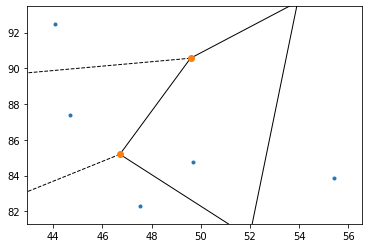

In [6]:
# This shows the voronoi plot for the 4th record in the df from right above.
voronoi_plot_2d(voronoi_frame.voronoi_object[3])
plt.show()

#### Producing a convex hull
Similar to voronoi-diagram, also the convex hull is of interest for movement-related data. In this package, the function `get_convex_hulls_areas` produces convex hull objects as well as the respective areas. Additionally, a set of attributes may be attached to the convex hull objects. Examples are:

- `points` (array of ints) Coordinates of input points

- `vertices` (array of ints ) Point indices forming the veritces of the convex hull

In [4]:
# Getting the convex hull. Note: Group-Output is also possible with the `group_output` parameter

hulls = mkit.get_convex_hulls_areas(data)
hulls.head()

,time,animal_id,x,y,convex_hull_object,convex_hull_volume
0,1,312,405.29,417.76,<scipy.spatial.qhull.ConvexHull object at 0x7e...,1519.44120
1,2,312,405.31,417.37,<scipy.spatial.qhull.ConvexHull object at 0x7e...,1528.95525
2,3,312,405.31,417.07,<scipy.spatial.qhull.ConvexHull object at 0x7e...,1539.23800
3,4,312,405.30,416.86,<scipy.spatial.qhull.ConvexHull object at 0x7e...,1549.61380
4,5,312,405.29,416.71,<scipy.spatial.qhull.ConvexHull object at 0x7e...,1560.33905


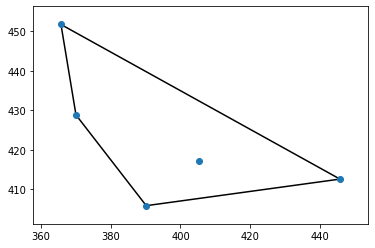

In [8]:
convex_hull_plot_2d(hulls.convex_hull_object[2])
plt.show()

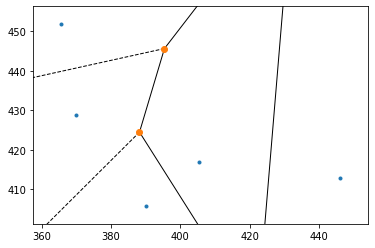

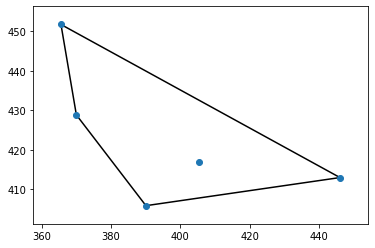

In [11]:
# Plot all scipy - spatial objects of a given timestamp
voronoi_plot_2d(voronoi_frame.voronoi_object[3])
convex_hull_plot_2d(hulls.convex_hull_object[3])
plt.show()